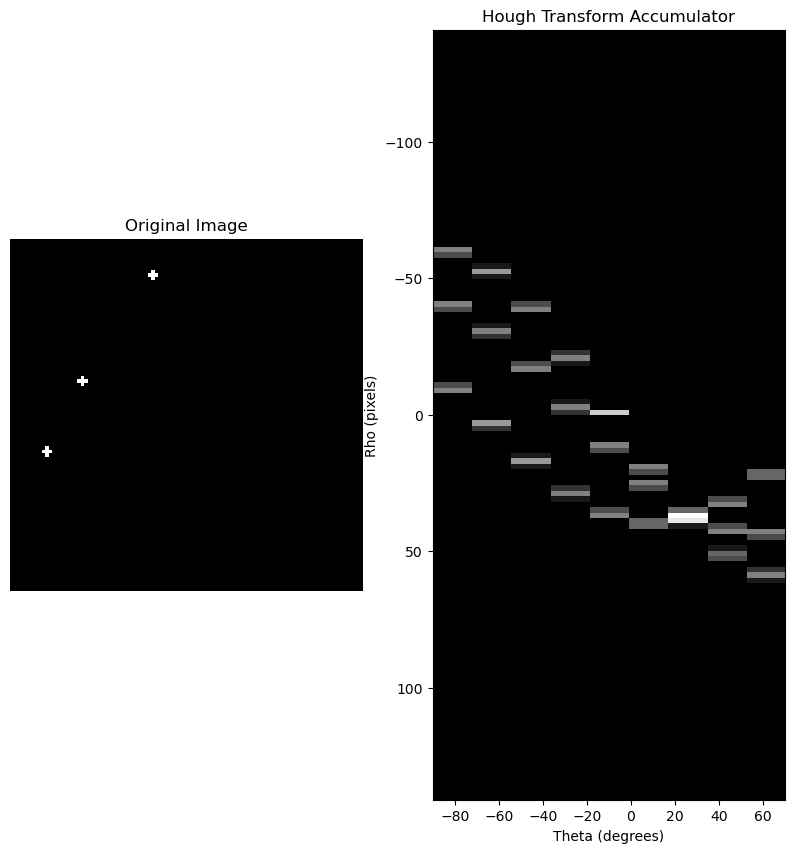

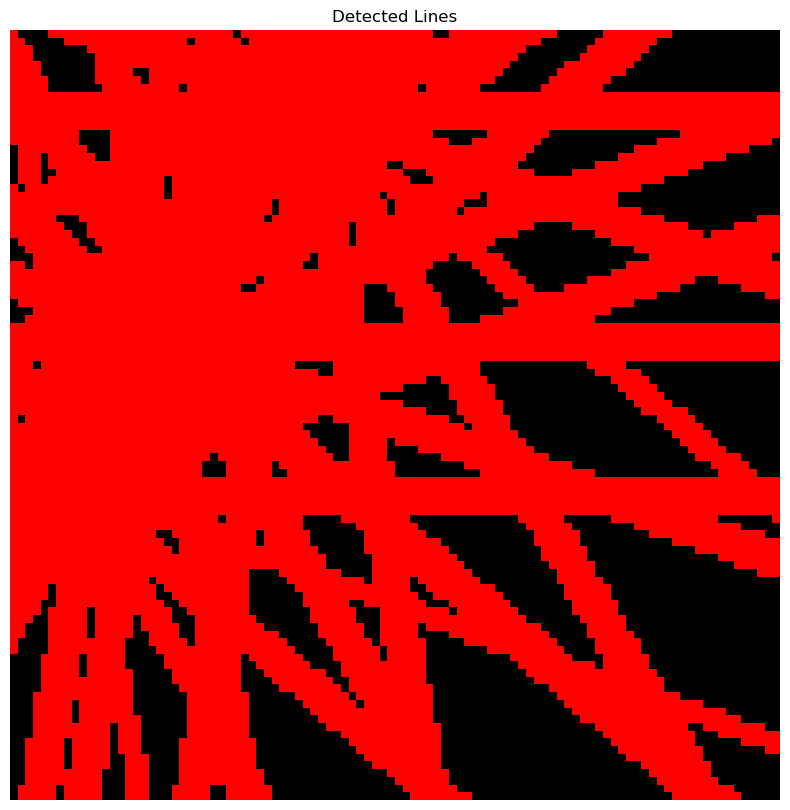

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def hough_transform(edges, theta_res=20, rho_res=2):
    height, width = edges.shape
    max_rho = int(np.hypot(height, width))
    rhos = np.arange(-max_rho, max_rho + rho_res, rho_res)
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))

    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.int32)
    y_idxs, x_idxs = np.nonzero(edges)  # Get edge pixel indices

    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for t_idx in range(len(thetas)):
            theta = thetas[t_idx]
            rho = int(x * np.cos(theta) + y * np.sin(theta))
            rho_idx = np.argmin(np.abs(rhos - rho))
            accumulator[rho_idx, t_idx] += 1

    return accumulator, thetas, rhos

def plot_hough_transform(image, accumulator, thetas, rhos):
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Hough Transform Accumulator")
    plt.imshow(accumulator, cmap='gray', aspect='auto', extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
    plt.xlabel("Theta (degrees)")
    plt.ylabel("Rho (pixels)")

    plt.show()

def detect_lines(edges, accumulator, thetas, rhos, threshold=100):
    lines = []
    for r_idx in range(accumulator.shape[0]):
        for t_idx in range(accumulator.shape[1]):
            if accumulator[r_idx, t_idx] >= threshold:
                rho = rhos[r_idx]
                theta = thetas[t_idx]
                lines.append((rho, theta))
    return lines

def draw_lines(image, lines):
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image

# Load example image and apply Canny edge detection
image = np.zeros((100, 100), dtype=np.uint8)
points = [(40, 10), (20, 40), (10, 60)]
for point in points:
    cv2.circle(image, point, 1, 255, -1)
edges = cv2.Canny(image, 50, 150)

# Perform Hough Transform
accumulator, thetas, rhos = hough_transform(edges)

# Plot the results
plot_hough_transform(image, accumulator, thetas, rhos)

# Detect lines using Hough Transform
lines = detect_lines(edges, accumulator, thetas, rhos, threshold=2)

# Draw detected lines on the image
result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
result_image = draw_lines(result_image, lines)

# Display the result
plt.figure(figsize=(10, 10))
plt.title("Detected Lines")
plt.imshow(result_image)
plt.axis('off')
plt.show()
